In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as smf

In [3]:
start_date= '2022-10-01'
end_date="2023-01-01"
tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA"]

#ticker=["GOOGL"]

In [4]:
def data_returns(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"].pct_change()).dropna())
       
    return returns

In [5]:
def data_(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"]).dropna())
       
    return returns

In [6]:
tada=data_(tickers,start_date,end_date)
tada

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GOOGL,MSFT,GC=F,TSLA,AAPL,BABA
Date,,,,,,
2022-10-03,98.639999,239.463684,1692.900024,242.399994,141.997284,80.449997
2022-10-04,101.639999,247.560532,1721.099976,249.440002,145.635681,84.110001
2022-10-05,101.430000,247.878815,1711.400024,240.809998,145.934723,84.389999
2022-10-06,101.419998,245.481598,1711.699951,238.130005,144.967804,84.320000
2022-10-07,98.680000,232.998138,1700.500000,223.070007,139.644775,81.239998
...,...,...,...,...,...,...
2022-12-23,89.230003,238.133545,1795.900024,123.150002,131.658981,85.650002
2022-12-27,87.389999,236.367981,1814.800049,109.099998,129.831772,89.860001
2022-12-28,86.019997,233.944031,1807.900024,112.709999,125.847855,87.199997


In [12]:
pond=pd.DataFrame([0.04, 0.2 , 0.32, 0.04, 0.04, 0.36])

portfolio=np.dot(tada,pond)
dta=pd.DataFrame(portfolio).pct_change().dropna()
pd.DataFrame(portfolio)

,0
0,637.904235
1,650.412326
2,647.131159
3,646.576216
4,638.461818
...,...
58,666.910277
59,673.412083
60,669.691927
61,675.995663


In [8]:
(dta.mean()+1)**63 -1

0    0.063848
dtype: float64

In [9]:
data=data_returns(tickers,start_date,end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
data.shape

(62, 6)

In [26]:
def Rentabilty(resultat):
    """ Retourne la rentabilité trimestriel de chaque actif """
    # act= list des actifs qui composeront le portefeuille
    mu=np.zeros(np.shape(resultat)[1])
    for i in range(np.shape(resultat)[1]):
        mu[i]= (1+np.mean(resultat.iloc[:,i]))**63-1
    return mu


In [20]:
def Matcov(resultat):
    """Calculer la matrice de ariance coariance des différents actifs"""
    sigma= resultat.cov()
    return sigma


In [35]:
lamda=np.linalg.cholesky(Matcov(data).to_numpy())

mu = Rentabilty(data)
lamda

array([[ 0.02639536,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.023373  ,  0.01046724,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.0037697 ,  0.00103873,  0.00982415,  0.        ,  0.        ,
         0.        ],
       [ 0.01738794,  0.00579462,  0.00020741,  0.03844371,  0.        ,
         0.        ],
       [ 0.02091329,  0.00584765, -0.00071849,  0.00432059,  0.01231373,
         0.        ],
       [ 0.01046365,  0.00159902,  0.00999604,  0.00830346,  0.00615662,
         0.03864469]])

In [102]:
const=100
N=np.random.normal(0,1,((data.shape)[1],const))


In [111]:
delta=  ((np.dot(lamda,N)).T +mu.T).T
len(delta[:,1])


6

In [105]:
X_O=(tada.iloc[0,:]).to_numpy()
X_O

array([  98.63999939,  239.46368408, 1692.90002441,  242.3999939 ,
        141.99728394,   80.44999695])

In [112]:
Y=np.zeros(((data.shape)[1],const))
for i in range((data.shape)[1]):
    for j in range(const):
        Y[i][j]= X_O[i]*(1+delta[i][j])

Y


array([[  95.00495302,   97.29208246,   87.60054506,   90.3236882 ,
          91.52345348,   91.05216646,   86.57157912,   87.34730748,
          87.05045324,   91.13329245,   90.51367358,   90.69128299,
          88.61131479,   90.92117054,   85.57546346,   91.15267965,
          88.0338141 ,   89.95895443,   88.91487344,   90.49028784,
          90.17753026,   90.78844264,   84.1994452 ,   85.6450547 ,
          89.88284332,   87.78839476,   85.48136969,   90.7024575 ,
          87.54662343,   93.09175065,   90.20360918,   91.34120583,
          90.63302659,   89.95888267,   90.61481918,   87.36679777,
          92.83990716,   89.97644592,   83.177611  ,   90.89747037,
          87.39119046,   89.37396526,   87.15643648,   91.15325413,
          84.61969217,   91.12567229,   92.00381225,   93.73143506,
          88.5752191 ,   89.91020551,   91.82099377,   92.09783988,
          92.84994485,   91.38903292,   90.42333819,   95.22462174,
          85.44903993,   88.4980638 ,   92.83782

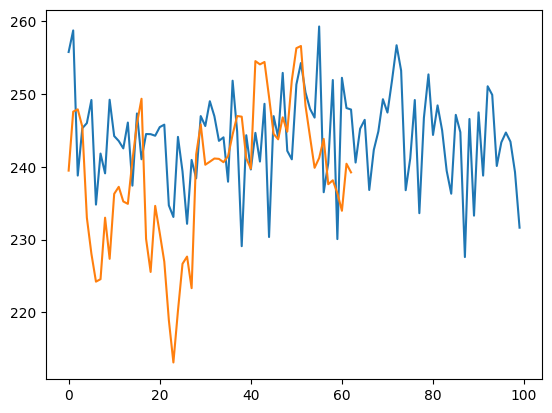

In [113]:
plt.plot(Y[1,:])
plt.plot(tada[["MSFT"]].to_numpy())
plt.show()

In [123]:
portf=np.dot(Y.T,pond)
portf_o=np.dot(X_O,pond)
prot=portf-portf_o

In [135]:
rt=(pd.DataFrame(prot).sort_values(by=0)).to_numpy()

In [140]:
rt[[50]]

array([[42.966157]])